# Analysis of the results for the Ximantis dataset
## Setup

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

## Results

In [2]:
result = torch.tensor(np.load("STGAN/ximantis_smooth_2/result/result.npy"), dtype=torch.float)

In [3]:
result.shape

torch.Size([5760, 42, 3])

In [4]:
camera_num = 19
feature_num = 0
timestamp = 12
day_length = 24 * timestamp
days = 1

<Axes: >

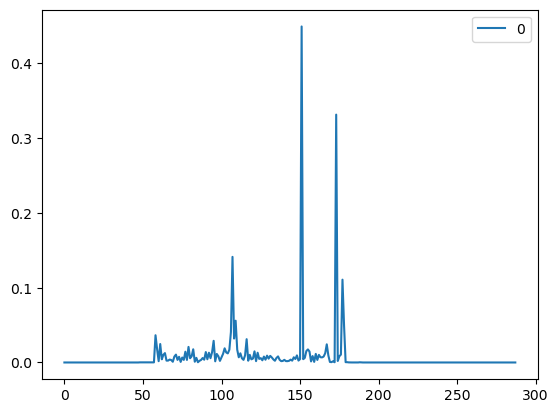

In [5]:
pd.DataFrame(result[:days*day_length, camera_num, feature_num].numpy()).plot()

<Axes: >

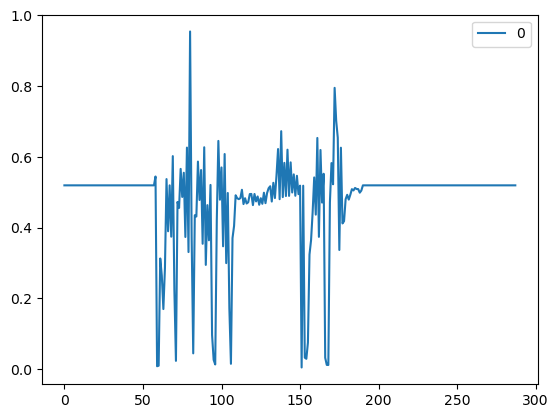

In [6]:
feature_num = 1
pd.DataFrame(result[:days*day_length, camera_num, feature_num].numpy()).plot()

<Axes: >

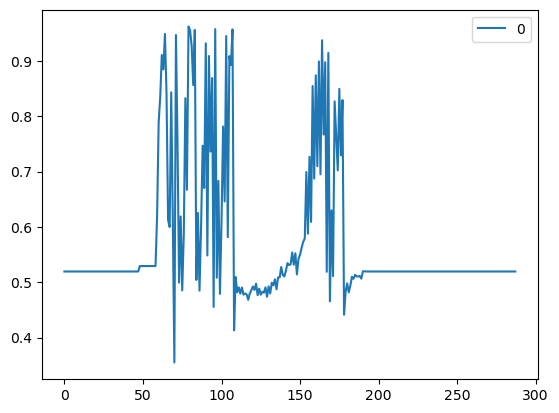

In [7]:
feature_num = 2
pd.DataFrame(result[:days*day_length, camera_num, feature_num].numpy()).plot()

## Anomaly score
Combining the two scores, from the generator and the discriminator.

In [8]:
s_G = pd.DataFrame(result[:days*day_length, camera_num, 0].numpy())
s_D = pd.DataFrame(result[:days*day_length, camera_num, 1].numpy()) - pd.DataFrame(result[:days*day_length, camera_num, 2].numpy())

In [9]:
# s_G = s_G/(s_G.max()-s_G.min())
# s_D = s_D/(s_D.max()-s_D.min())

<Axes: >

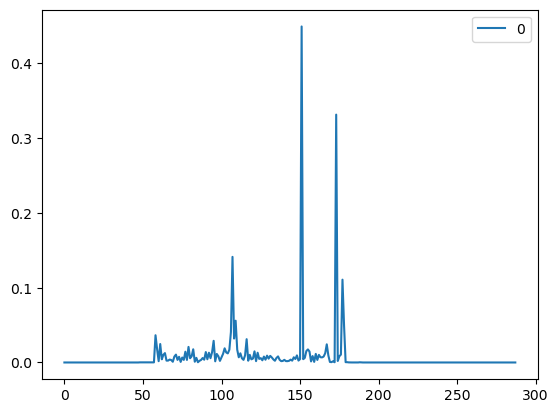

In [10]:
s_G.plot()

<Axes: >

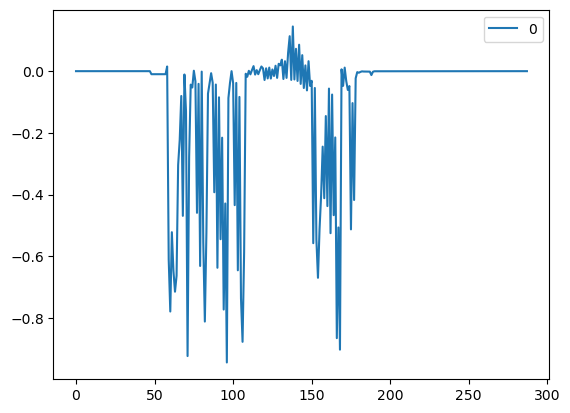

In [11]:
s_D.plot()

In [12]:
lambda_coef = 1.0
anomaly_score = s_G + lambda_coef * s_D
anomaly_score.columns = ["Score"]

In [13]:
anomaly_score

,Score
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
283,0.0
284,0.0
285,0.0
286,0.0


<Axes: >

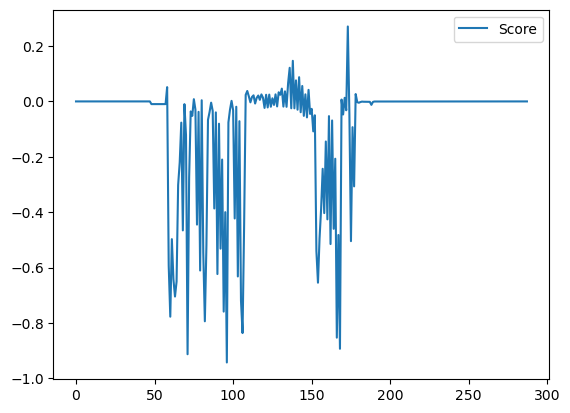

In [14]:
anomaly_score.plot()

In [15]:
anomaly_threshold = .75
anomalies = anomaly_score[anomaly_score.Score > anomaly_threshold].index
anomalies

Int64Index([], dtype='int64')

## Real data

In [16]:
data = torch.tensor(np.load("STGAN/ximantis_smooth_2/data/data.npy"), dtype=torch.float)
data.shape

torch.Size([52128, 42, 1, 1])

In [17]:
train_time = 178
df = pd.DataFrame(data[train_time*day_length:(train_time+days)*day_length, camera_num, 0, 0])
df.columns = ["Flow"]

<Axes: >

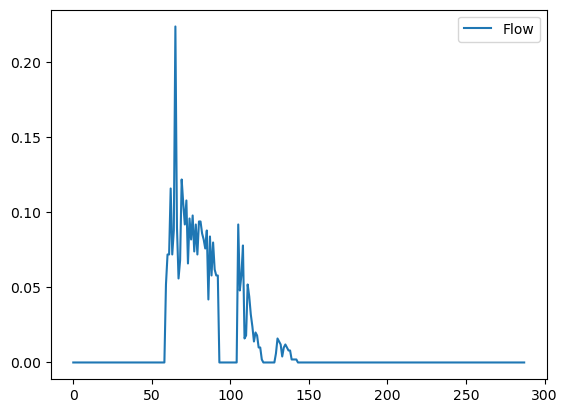

In [18]:
df.plot()

In [19]:
anomalies

Int64Index([], dtype='int64')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


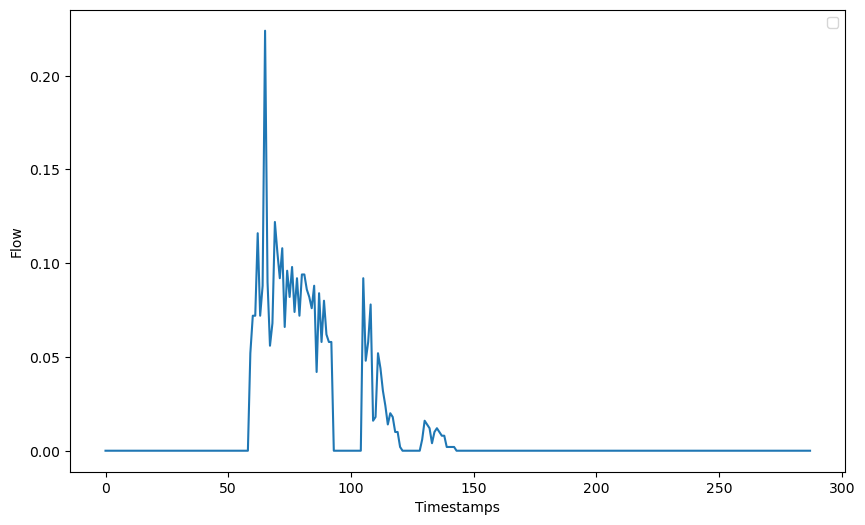

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df["Flow"])

for i, time in enumerate(anomalies):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Flow")
plt.legend()
plt.show()

## Anomaly scores from all the cameras

In [21]:
lambda_coef = 1.0
camera_num = 0
s_G = pd.DataFrame(result[:, camera_num, 0].numpy())
s_D = pd.DataFrame(result[:, camera_num, 1].numpy()) - pd.DataFrame(result[:, camera_num, 2].numpy())
column_name = "ScoreCamera" + str(camera_num)
anomaly_score = pd.DataFrame([], columns=[column_name])
anomaly_score[column_name] = s_G + lambda_coef * s_D

In [22]:
camera_num = 41
s_G = pd.DataFrame(result[:, camera_num, 0].numpy())
s_D = pd.DataFrame(result[:, camera_num, 1].numpy()) - pd.DataFrame(result[:, camera_num, 2].numpy())
column_name = "ScoreCamera" + str(camera_num)
anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

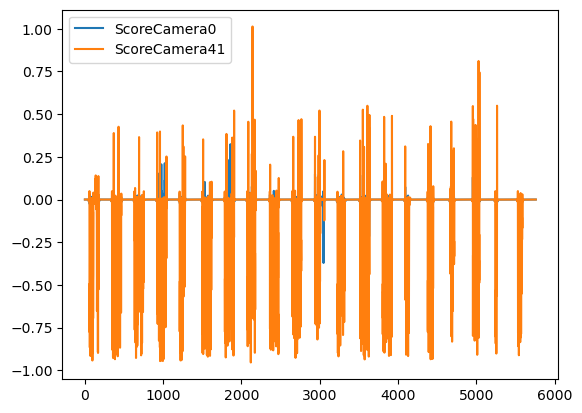

In [23]:
anomaly_score.plot()


In [24]:
lambda_coef = 1.0
for camera_num in range(result.shape[1]):
    column_name = "ScoreCamera" + str(camera_num)
    if camera_num == 0:
        anomaly_score = pd.DataFrame([], columns=[column_name])
    s_G = pd.DataFrame(result[:, camera_num, 0].numpy())
    s_D = pd.DataFrame(result[:, camera_num, 1].numpy()) - pd.DataFrame(result[:, camera_num, 2].numpy())
    anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

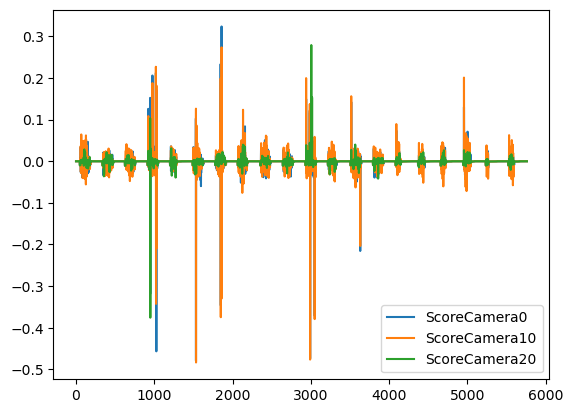

In [25]:
anomaly_score[["ScoreCamera0", "ScoreCamera10", "ScoreCamera20"]].plot()

In [26]:
anomaly_score

,ScoreCamera0,ScoreCamera1,ScoreCamera2,ScoreCamera3,ScoreCamera4,ScoreCamera5,ScoreCamera6,ScoreCamera7,ScoreCamera8,ScoreCamera9,...,ScoreCamera32,ScoreCamera33,ScoreCamera34,ScoreCamera35,ScoreCamera36,ScoreCamera37,ScoreCamera38,ScoreCamera39,ScoreCamera40,ScoreCamera41
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Selecting the top K% anomaly scores

In [27]:
K = 0.00004

In [28]:
anomaly_score_flattened = pd.Series([], dtype=float)
for i, col in enumerate(anomaly_score.columns):
    anomaly_score_flattened = pd.concat([anomaly_score_flattened, anomaly_score[col]], ignore_index=True)
anomaly_score_flattened

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
241915    0.0
241916    0.0
241917    0.0
241918    0.0
241919    0.0
Length: 241920, dtype: float32

In [29]:
top = int(np.floor(K * len(anomaly_score_flattened)))

<Axes: >

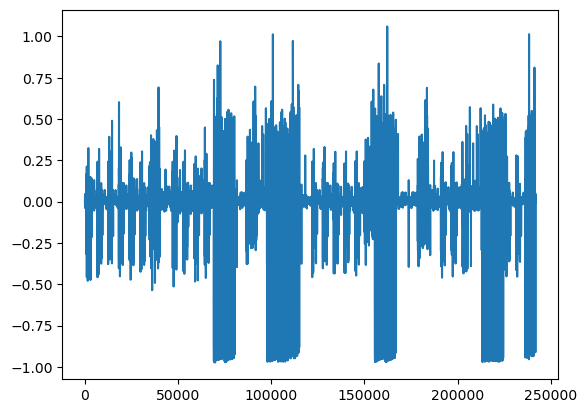

In [30]:
anomaly_score_flattened.plot()

In [31]:
anomalies = anomaly_score_flattened.sort_values(ascending=False)[:top].index
anomalies

Int64Index([162203, 238301, 100859, 111581, 72635, 157661, 71261, 241188,
            241199],
           dtype='int64')

## Plotting the anomalies for a specific camera

In [32]:
camera_nums, minutes = divmod(anomalies,result.shape[0])

In [33]:
camera_nums

Int64Index([28, 41, 17, 19, 12, 27, 12, 41, 41], dtype='int64')

In [34]:
minutes

Int64Index([923, 2141, 2939, 2141, 3515, 2141, 2141, 5028, 5039], dtype='int64')

In [35]:
# Choose the camera
camera_num = 6

In [36]:
minutes[camera_nums == camera_num]

Int64Index([], dtype='int64')

In [37]:
# Read again, all the training data
data = torch.tensor(np.load("STGAN/ximantis_smooth_2/data/data.npy"), dtype=torch.float)
df = pd.DataFrame(data[train_time*day_length:, camera_num, 0, 0])
df.columns = ["Flow"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


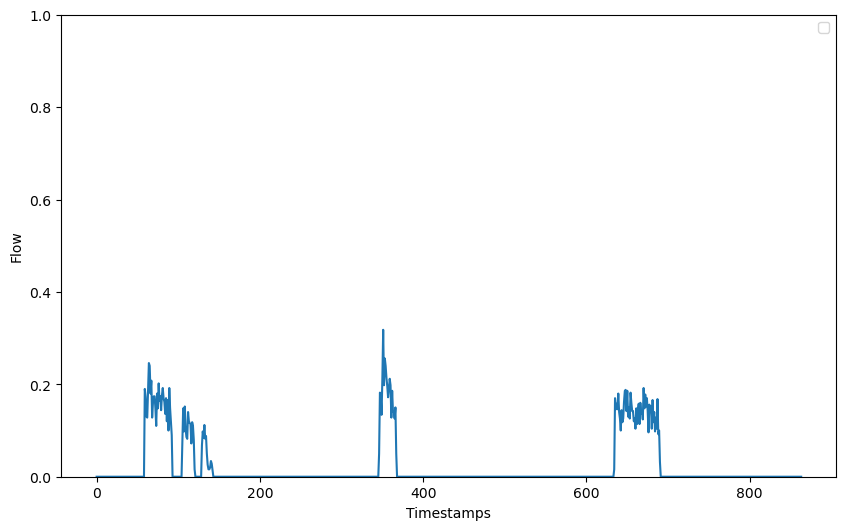

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(df["Flow"])

for i, time in enumerate(minutes[camera_nums == camera_num]):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Flow")
plt.ylim([0,1])
plt.legend()
plt.show()

### Creating a function

In [39]:
def plot_anomalies(camera_num, K=0.00004, anomaly_score=anomaly_score, train_time=12):
    anomaly_score_flattened = pd.Series([], dtype=float)
    for i, col in enumerate(anomaly_score.columns):
        anomaly_score_flattened = pd.concat([anomaly_score_flattened, anomaly_score[col]], ignore_index=True)
    top = int(np.floor(K * len(anomaly_score_flattened)))
    anomalies = anomaly_score_flattened.sort_values(ascending=False)[:top].index
    camera_nums, minutes = divmod(anomalies, anomaly_score.shape[0])
    data = torch.tensor(np.load("STGAN/ximantis_smooth_2/data/data.npy"), dtype=torch.float)
    df = pd.DataFrame(data[train_time*day_length:, camera_num, 0, 0])
    plt.figure(figsize=(10, 6))
    plt.plot(df)

    for i, time in enumerate(minutes[camera_nums == camera_num]):
        if i == 0:
            plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
        else:
            plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


    plt.xlabel("Timestamps")
    plt.ylabel("Flow")
    plt.ylim([0,1])
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


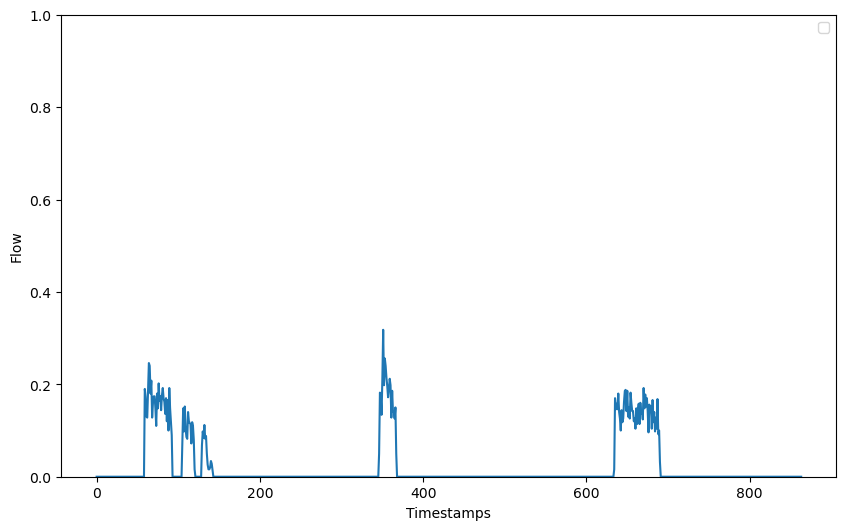

In [40]:
plot_anomalies(camera_num, K, anomaly_score, train_time)

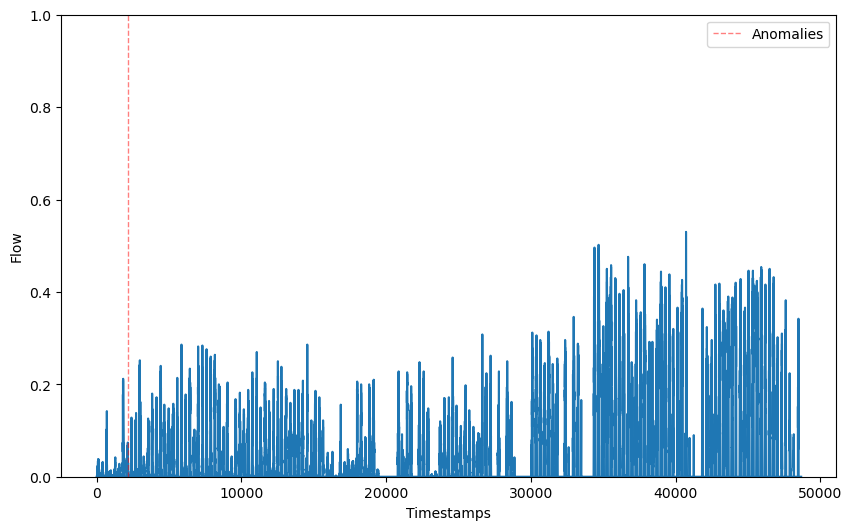

In [41]:
plot_anomalies(camera_num=19)